 PARTE 1 EJERCICIO 1

In [1]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Defino los tipos de datos para cada columna
tipos_datos = {
    "Nombre": "string",        # Tipo de dato cadena
    "Edad": "Int64",           # Tipo de dato entero, permite nulos con "Int64" en vez de "int"
    "Fecha Ingreso": "string",  # Tipo de dato cadena, para convertirla a datetime después si es necesario
    "Resultado Prueba": "string" # Tipo de dato cadena
}


In [3]:
# Se crea mi diccionario de datos
datos = { 'Nombre':['Carlos', 'Ana', 'Luis', 'Pedro', 'Maria', None],
          'Edad':[34, 29, None, 45, 25, 33 ],
          'Fecha Ingreso':['2021-01-15', '2020/03/12', '2022-07-01', '2021/12/01', '2021-05-20', '2020-03-12'],
          'Resultado Prueba': ['Positivo' ,'Negativo', 'Positivo', 'Positivo', 'Negativo', 'Negativo']
}

In [4]:
# Creación del dataframe llamado df
df = pd.DataFrame(datos)

# Asignamos los tipos a mi nuevo dataframe df_pacientes
df_pacientes = df.astype(tipos_datos)


In [5]:
# Imprimo mi dataframe y sus respectivos tipos
print(df_pacientes)
print("\n",df_pacientes.dtypes)

   Nombre  Edad Fecha Ingreso Resultado Prueba
0  Carlos    34    2021-01-15         Positivo
1     Ana    29    2020/03/12         Negativo
2    Luis  <NA>    2022-07-01         Positivo
3   Pedro    45    2021/12/01         Positivo
4   Maria    25    2021-05-20         Negativo
5    <NA>    33    2020-03-12         Negativo

 Nombre              string[python]
Edad                         Int64
Fecha Ingreso       string[python]
Resultado Prueba    string[python]
dtype: object


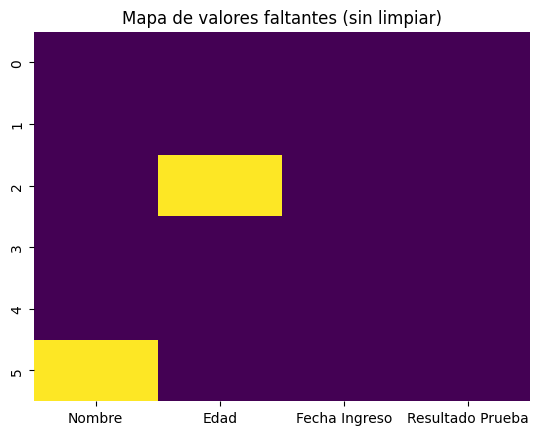

In [6]:
# Visualizar valores faltantes en cada columna
sns.heatmap(df_pacientes.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de valores faltantes (sin limpiar)')
plt.show()

In [7]:
# Reemplazar las barras (/) por guiones (-) en la columna 'Fecha Ingreso'
df_pacientes['Fecha Ingreso'] = df_pacientes['Fecha Ingreso'].str.replace('/', '-', regex=False)

# Imprimir el DataFrame para verificar el cambio
print(df_pacientes)


   Nombre  Edad Fecha Ingreso Resultado Prueba
0  Carlos    34    2021-01-15         Positivo
1     Ana    29    2020-03-12         Negativo
2    Luis  <NA>    2022-07-01         Positivo
3   Pedro    45    2021-12-01         Positivo
4   Maria    25    2021-05-20         Negativo
5    <NA>    33    2020-03-12         Negativo


In [8]:
# Convertir la columna 'Fecha Ingreso' a tipo datetime
df_pacientes['Fecha Ingreso'] = pd.to_datetime(df_pacientes['Fecha Ingreso'], errors='coerce')
print(df_pacientes)

   Nombre  Edad Fecha Ingreso Resultado Prueba
0  Carlos    34    2021-01-15         Positivo
1     Ana    29    2020-03-12         Negativo
2    Luis  <NA>    2022-07-01         Positivo
3   Pedro    45    2021-12-01         Positivo
4   Maria    25    2021-05-20         Negativo
5    <NA>    33    2020-03-12         Negativo


In [9]:
# Eliminar filas donde el valor en la columna 'Nombre' es None
df_pacientes = df_pacientes[df_pacientes['Nombre'].notna()]

# Verificar el DataFrame después de eliminar los registros
print(df_pacientes)


   Nombre  Edad Fecha Ingreso Resultado Prueba
0  Carlos    34    2021-01-15         Positivo
1     Ana    29    2020-03-12         Negativo
2    Luis  <NA>    2022-07-01         Positivo
3   Pedro    45    2021-12-01         Positivo
4   Maria    25    2021-05-20         Negativo


In [10]:
## 1. Columna Edad: Rellenar con la mediana
# Calcular la mediana de 'Edad' y redondearla a entero
mediana_edad = int(df_pacientes['Edad'].median())

# Rellenar los valores nulos en 'Edad' con la mediana redondeada
df_pacientes['Edad'].fillna(mediana_edad, inplace=True)

# Verificar el DataFrame después de la operación
print(df_pacientes)


   Nombre  Edad Fecha Ingreso Resultado Prueba
0  Carlos    34    2021-01-15         Positivo
1     Ana    29    2020-03-12         Negativo
2    Luis    31    2022-07-01         Positivo
3   Pedro    45    2021-12-01         Positivo
4   Maria    25    2021-05-20         Negativo


<ipython-input-10-a09fc6b92024>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pacientes['Edad'].fillna(mediana_edad, inplace=True)


EJERCICIO 2

In [11]:
#Defino los tipos de datos para cada columna
tipos_datos1 = {
     "Cliente ID": "Int64",       # Tipo dato entero, no permite nulos
     "Producto": "string",        # Tipo de dato cadena
     "Cantidad": "Int64",         # Tipo de dato entero, permite nulos con "Int64" en vez de "int"
     "Precio": "string",         # Tipo de dato string, para que me deje agregar el $ y cuatrocientos y hacer el proceso de limpieza
     "Fecha Transaccion": "string",    # Tipo de dato cadena, para convertirla a datetime después si es necesario
    }

In [12]:
# Se crea mi diccionario de datos
clientes = { 'Cliente ID':[1, 2, 3, 4, 5],
          'Producto':['A', 'B', 'C', 'D', 'E'],
          'Cantidad' :[10, 20, None, 5, 15],
          'Precio' :[100, '200$', 300, 'cuatrocientos', 500],
          'Fecha Transaccion':['2023-01-15', '2023/02/20', '2023-03-25', '2023/04/30', '2023-05-10'],
          }

In [13]:
# Creación del dataframe llamado df
df1 = pd.DataFrame(clientes)

# Asignamos los tipos a mi nuevo dataframe df_pacientes
df_clientes = df1.astype(tipos_datos1)


In [14]:
# Imprimo mi dataframe y sus respectivos tipos
print(df_clientes)
print("\n",df_clientes.dtypes)

   Cliente ID Producto  Cantidad         Precio Fecha Transaccion
0           1        A        10            100        2023-01-15
1           2        B        20           200$        2023/02/20
2           3        C      <NA>            300        2023-03-25
3           4        D         5  cuatrocientos        2023/04/30
4           5        E        15            500        2023-05-10

 Cliente ID                    Int64
Producto             string[python]
Cantidad                      Int64
Precio               string[python]
Fecha Transaccion    string[python]
dtype: object


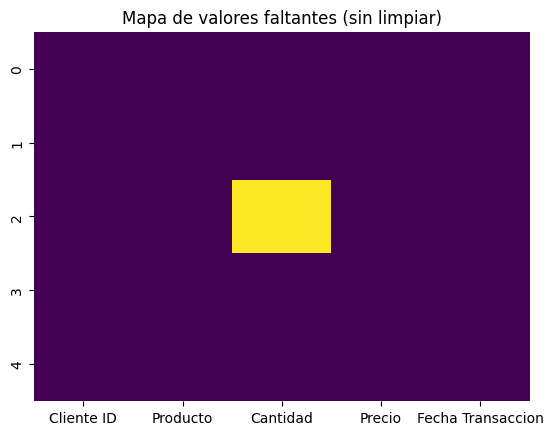

In [15]:
# Visualizar valores faltantes en cada columna
sns.heatmap(df_clientes.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de valores faltantes (sin limpiar)')
plt.show()

In [16]:
## 1. Columna Cantidad: Rellenar con la mediana
# Calcular la mediana de 'Cantidad' y redondearla a entero
mediana_cantidad = int(df_clientes['Cantidad'].median())

# Rellenar los valores nulos en 'Edad' con la mediana redondeada
df_clientes['Cantidad'].fillna(mediana_cantidad, inplace=True)

# Verificar el DataFrame después de la operación
print(df_clientes)

   Cliente ID Producto  Cantidad         Precio Fecha Transaccion
0           1        A        10            100        2023-01-15
1           2        B        20           200$        2023/02/20
2           3        C        12            300        2023-03-25
3           4        D         5  cuatrocientos        2023/04/30
4           5        E        15            500        2023-05-10


<ipython-input-16-0bf9ff2ee873>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clientes['Cantidad'].fillna(mediana_cantidad, inplace=True)


In [17]:
# Limpieza de la columna "Precio"
df_clientes['Precio'] = pd.to_numeric(
    df_clientes['Precio'].str.replace(r'[$]', '', regex=True),  # Elimina el símbolo $
    errors='coerce'  # Reemplaza valores no convertibles con NaN
)

# Revisión del DataFrame
print(df_clientes)


   Cliente ID Producto  Cantidad  Precio Fecha Transaccion
0           1        A        10     100        2023-01-15
1           2        B        20     200        2023/02/20
2           3        C        12     300        2023-03-25
3           4        D         5    <NA>        2023/04/30
4           5        E        15     500        2023-05-10


In [18]:
# Rellenar el campo faltante en precio con la media
df_clientes['Precio'] = df_clientes['Precio'].fillna(df_clientes['Precio'].mean())

# Revisión del DataFrame
print(df_clientes)


   Cliente ID Producto  Cantidad  Precio Fecha Transaccion
0           1        A        10     100        2023-01-15
1           2        B        20     200        2023/02/20
2           3        C        12     300        2023-03-25
3           4        D         5     275        2023/04/30
4           5        E        15     500        2023-05-10


In [19]:
# Reemplazar las barras (/) por guiones (-) en la columna 'Fecha Ingreso'
df_clientes['Fecha Transaccion'] = df_clientes['Fecha Transaccion'].str.replace('/', '-', regex=False)

# Imprimir el DataFrame para verificar el cambio
print(df_clientes)

   Cliente ID Producto  Cantidad  Precio Fecha Transaccion
0           1        A        10     100        2023-01-15
1           2        B        20     200        2023-02-20
2           3        C        12     300        2023-03-25
3           4        D         5     275        2023-04-30
4           5        E        15     500        2023-05-10


In [20]:
# Convertir la columna 'Fecha Ingreso' a tipo datetime
df_clientes['Fecha Transaccion'] = pd.to_datetime(df_clientes['Fecha Transaccion'], errors='coerce')
print(df_clientes)

   Cliente ID Producto  Cantidad  Precio Fecha Transaccion
0           1        A        10     100        2023-01-15
1           2        B        20     200        2023-02-20
2           3        C        12     300        2023-03-25
3           4        D         5     275        2023-04-30
4           5        E        15     500        2023-05-10


**ESCENARIO** **A**

In [32]:
# Se crea mi diccionario de datos
clientes2 = {
          'Nombre':['Juan', 'Maria', 'Pedro', 'Ana', 'Luisa', 'Carlos', 'Juan'],
          'Edad':[25, 30, None, 29, 28, 200, 25],
          'E-mail' :['juan@mail.com', 'maria@mail.com', 'pedro@mail.com', 'ana@mail.com', 'luisa@mail.com','carlos@mail.com', 'juan@mail.com'],
          'Pais':['colombia', 'Colombia', 'Mexico', 'Argentina', 'Colombia', 'Brazil', 'colombia'],
          'Genero' :['M', 'F', 'H', 'F', 'Femenino', 'M', 'M'],
          'Numero Visitas Tienda':[5, 7, 6, 4, 8, 2, 5],
          }

In [33]:
#Defino los tipos de datos para cada columna
tipos_datos2 = {
     "Nombre": "string",
     "Edad": "string", #para que me acepte None y poder realizar la limpieza
     "E-mail": "string",
     "Pais": "string",
     "Genero": "string",
     "Numero Visitas Tienda": "Int64",
     }

In [34]:
# Creación del dataframe llamado df2
df2 = pd.DataFrame(clientes2)

# Asignamos los tipos a mi nuevo dataframe df_pacientes
df_clientes2 = df2.astype(tipos_datos2)

In [35]:
# Imprimo mi dataframe y sus respectivos tipos
print(df_clientes2)
print("\n",df_clientes2.dtypes)

   Nombre   Edad           E-mail       Pais    Genero  Numero Visitas Tienda
0    Juan   25.0    juan@mail.com   colombia         M                      5
1   Maria   30.0   maria@mail.com   Colombia         F                      7
2   Pedro   <NA>   pedro@mail.com     Mexico         H                      6
3     Ana   29.0     ana@mail.com  Argentina         F                      4
4   Luisa   28.0   luisa@mail.com   Colombia  Femenino                      8
5  Carlos  200.0  carlos@mail.com     Brazil         M                      2
6    Juan   25.0    juan@mail.com   colombia         M                      5

 Nombre                   string[python]
Edad                     string[python]
E-mail                   string[python]
Pais                     string[python]
Genero                   string[python]
Numero Visitas Tienda             Int64
dtype: object


In [36]:
# Contar duplicados
duplicados = df_clientes2.duplicated().sum()
print(f"Duplicados en el dataset: {duplicados}")

Duplicados en el dataset: 1


In [38]:
#Eliminar duplicados
df_clientes2 = df_clientes2.drop_duplicates()
print(df_clientes2)

   Nombre   Edad           E-mail       Pais    Genero  Numero Visitas Tienda
0    Juan   25.0    juan@mail.com   colombia         M                      5
1   Maria   30.0   maria@mail.com   Colombia         F                      7
2   Pedro   <NA>   pedro@mail.com     Mexico         H                      6
3     Ana   29.0     ana@mail.com  Argentina         F                      4
4   Luisa   28.0   luisa@mail.com   Colombia  Femenino                      8
5  Carlos  200.0  carlos@mail.com     Brazil         M                      2


In [39]:
# Convertir la columna 'Edad' a numérica (coerce convierte errores a NaN)
df_clientes2['Edad'] = pd.to_numeric(df_clientes2['Edad'], errors='coerce')

# Eliminar valores atípicos (e.g., edades fuera del rango 0-120)
df_clientes2.loc[(df_clientes2['Edad'] < 0) | (df_clientes2['Edad'] > 120), 'Edad'] = None

# Calcular la mediana excluyendo valores atípicos
mediana_edad = df_clientes2['Edad'].median()

# Rellenar valores nulos con la mediana
df_clientes2['Edad'].fillna(mediana_edad, inplace=True)

# Redondear los valores en la columna 'Edad'
df_clientes2['Edad'] = df_clientes2['Edad'].round().astype('Int64')  # Convertir a enteros con soporte para NaN

# Mostrar el DataFrame limpio
print(df_clientes2)

   Nombre  Edad           E-mail       Pais    Genero  Numero Visitas Tienda
0    Juan    25    juan@mail.com   colombia         M                      5
1   Maria    30   maria@mail.com   Colombia         F                      7
2   Pedro    28   pedro@mail.com     Mexico         H                      6
3     Ana    29     ana@mail.com  Argentina         F                      4
4   Luisa    28   luisa@mail.com   Colombia  Femenino                      8
5  Carlos    28  carlos@mail.com     Brazil         M                      2


<ipython-input-39-540b8c6e7972>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clientes2['Edad'].fillna(mediana_edad, inplace=True)


In [41]:
# Estandarizar los valores de la columna 'Pais'
df_clientes2['Pais'] = df_clientes2['Pais'].str.title()  # Convertir a formato Title Case

# Corregir "Brazil" por "Brasil"
df_clientes2['Pais'] = df_clientes2['Pais'].replace("Brazil", "Brasil")

print(df_clientes2)

   Nombre  Edad           E-mail       Pais    Genero  Numero Visitas Tienda
0    Juan    25    juan@mail.com   Colombia         M                      5
1   Maria    30   maria@mail.com   Colombia         F                      7
2   Pedro    28   pedro@mail.com     Mexico         H                      6
3     Ana    29     ana@mail.com  Argentina         F                      4
4   Luisa    28   luisa@mail.com   Colombia  Femenino                      8
5  Carlos    28  carlos@mail.com     Brasil         M                      2


In [42]:
# Estandarizar la columna Genero (convertir a formato uniforme)
df_clientes2['Genero'] = df_clientes2['Genero'].replace({
    'M': 'Masculino',
    'H': 'Masculino',
    'F': 'Femenino',
    'Femenino': 'Femenino'
})

# Mostrar el DataFrame resultante
print(df_clientes2)

   Nombre  Edad           E-mail       Pais     Genero  Numero Visitas Tienda
0    Juan    25    juan@mail.com   Colombia  Masculino                      5
1   Maria    30   maria@mail.com   Colombia   Femenino                      7
2   Pedro    28   pedro@mail.com     Mexico  Masculino                      6
3     Ana    29     ana@mail.com  Argentina   Femenino                      4
4   Luisa    28   luisa@mail.com   Colombia   Femenino                      8
5  Carlos    28  carlos@mail.com     Brasil  Masculino                      2
